# **DIABETES PREDICTION**
---
### Importing Dependencies

In [1]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Data Collection and Analysis
PIMA Diabetes Dataset

In [2]:

#loading the dataset to a pandas df
df = pd.read_csv('diabetes.csv')

#printing the first 5 rows
df.head(100)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Data Cleaning
Drop duplicates

In [6]:

print('Before dropping duplicates: ', df.shape)
df = df.drop_duplicates()
print('After dropping duplicates: ', df.shape)


Before dropping duplicates:  (768, 9)
After dropping duplicates:  (768, 9)


Check for NULL values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for missing values

In [8]:

print('No of missing values in Glucose: ', df[df['Glucose'] == 0].shape[0])
print('No of missing values in BloodPressure: ', df[df['BloodPressure'] == 0].shape[0])
print('No of missing values in SkinThickness: ', df[df['SkinThickness'] == 0].shape[0])
print('No of missing values in Insulin: ', df[df['Insulin'] == 0].shape[0])
print('No of missing values in BMI: ', df[df['BMI'] == 0].shape[0])


No of missing values in Glucose:  5
No of missing values in BloodPressure:  35
No of missing values in SkinThickness:  227
No of missing values in Insulin:  374
No of missing values in BMI:  11


Replace missing values with mean

In [9]:

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Visualisation

Negative(0) -> 500
Positive(1) -> 268


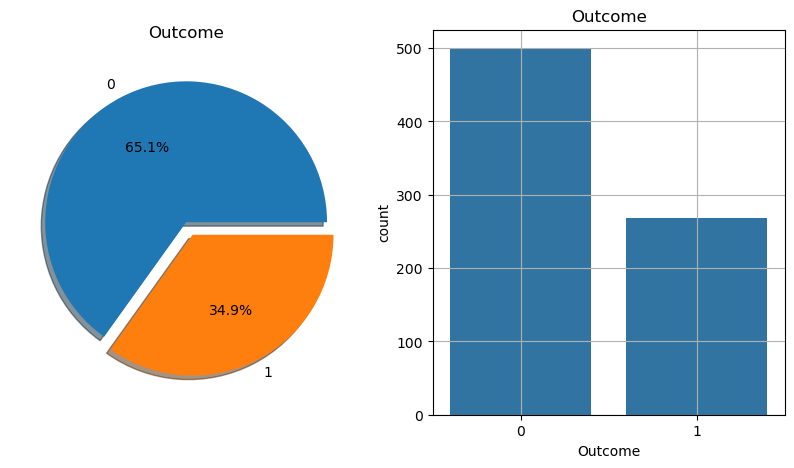

In [10]:

import matplotlib.pyplot as plt
f, ax = plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

import seaborn as sns
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
N, P = df['Outcome'].value_counts()
print('Negative(0) ->', N)
print('Positive(1) ->', P)

plt.grid()
plt.show()


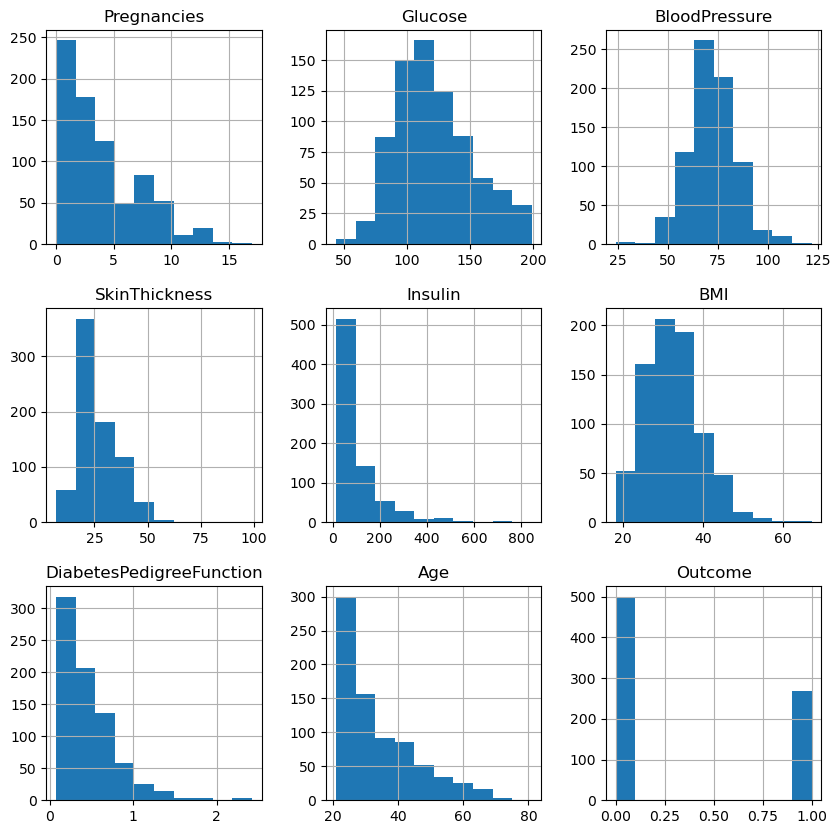

In [11]:

df.hist(bins=10,figsize=(10,10))
plt.show()


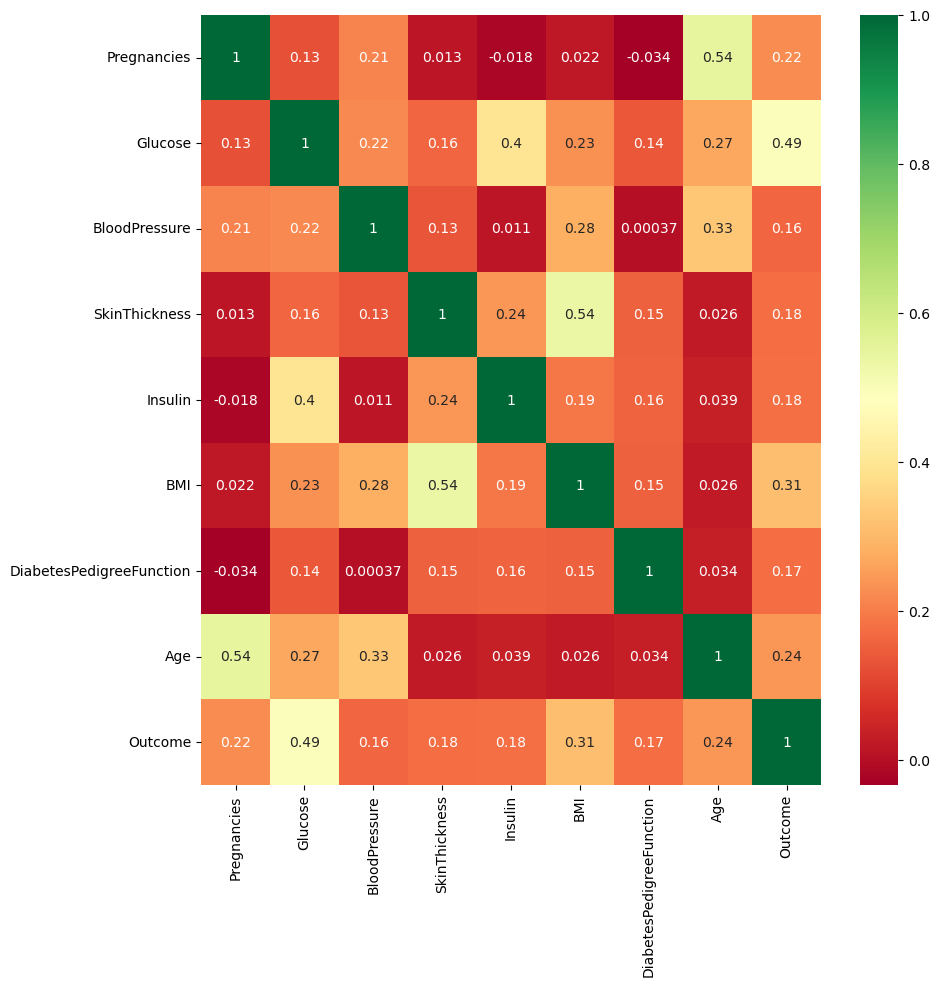

In [12]:

corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')


### Split data into X and y

In [13]:

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
print(X.head())
print(y.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


### Data Standardisation - Feature Scaling

In [14]:

scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)

X = standardised_data
y = df.Outcome
print(X[:5])
print(y.head())


[[ 0.63994726  0.86527574 -0.0210444   0.87205698 -0.41776815  0.16725546
   0.46849198  1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286  0.2486783  -0.41776815 -0.85153454
  -0.36506078 -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 -0.6306536  -0.41776815 -1.33182125
   0.60439732 -0.10558415]
 [-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
  -0.92076261 -1.04154944]
 [-1.14185152  0.50362629 -2.66391618  0.87205698  0.5304233   1.54989902
   5.4849091  -0.0204964 ]]
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


### Split data into training and testing data

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


### Classification Models

In [16]:

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)


c:\Users\nsr96\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [17]:

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [18]:

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [19]:

from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [20]:

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy')

### Predicting & Evaluating the Models

In [22]:

lr_preds = lr_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

print('Accuracy score of Logistic Regression:', round(accuracy_score(y_test, lr_preds) * 100, 2))
print('Accuracy score of KNN:', round(accuracy_score(y_test, knn_preds) * 100, 2))
print('Accuracy score of Naive Bayes:', round(accuracy_score(y_test, nb_preds) * 100, 2))
print('Accuracy score of SVM:', round(accuracy_score(y_test, svm_preds) * 100, 2))
print('Accuracy score of Decision Tree:', round(accuracy_score(y_test, dt_preds) * 100, 2))
print('Accuracy score of Random Forest:', round(accuracy_score(y_test, rf_preds) * 100, 2))


Accuracy score of Logistic Regression: 77.27
Accuracy score of KNN: 74.68
Accuracy score of Naive Bayes: 74.03
Accuracy score of SVM: 83.12
Accuracy score of Decision Tree: 79.87
Accuracy score of Random Forest: 79.87


### Save the Model with the Highest Accuracy using pickle

In [25]:
import os
import pickle

# Path to your Flask project
save_path = r"D:\Downloads\ml_algo\diabetes-predictor"

with open(os.path.join(save_path, "Scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

with open(os.path.join(save_path, "SVM_model.pkl"), "wb") as f:
    pickle.dump(svm_model, f)

print("Files saved at:", save_path)


Files saved at: D:\Downloads\ml_algo\diabetes-predictor
